<a href="https://colab.research.google.com/github/VolkhinD/Houses/blob/main/houses_begining_oct_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Basic Work with Data***
\
In this work only basic preprocessing job done. I devide data into 2 parts:
* Only Good featrures I choose 
* All features \
As a result, there are 2 notebooks continue this one

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector as selector

Download Data

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
path = '/content/drive/MyDrive/Data/houses/train.csv'
path1 = '/content/drive/MyDrive/Data/houses/test.csv'
df = pd.read_csv(path)
test_data = pd.read_csv(path1)
print(df.shape)

(1460, 81)


# Work with Data

  Working with all columns I devided them into 3 categories: strong, good and not important for target based on my opinion only. Later I will be using different types of feature selection. \
 I left only 26 features and created 1 new: total number of bathrooms. 

 ## Understand Data

MSSubClass: The building class 
The biggest prices from 60

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property
not important

LotArea: Lot size in square feet
no

Street: Type of road access
Just 2 values no

Alley: Type of alley access
1369 Null values

LotShape: General shape of property
no

LandContour: Flatness of the property
no

Utilities: Type of utilities available
just 1! different value

LotConfig: Lot configuration
no

LandSlope: Slope of property
no

Neighborhood: Physical locations within Ames city limits
good

Condition1: Proximity to main road or railroad
yes

Condition2: Proximity to main road or railroad (if a second is present)
didn't get it, no

BldgType: Type of dwelling
yes

HouseStyle: Style of dwelling
yes

OverallQual: Overall material and finish quality
STRONG

OverallCond: Overall condition rating
Categorical values
yes

YearBuilt: Original construction date
yes

YearRemodAdd: Remodel date
Works with prev feature, check

RoofStyle: Type of roof
yes

RoofMatl: Roof material
yes

Exterior1st: Exterior covering on house
?

Exterior2nd: Exterior covering on house (if more than one material)
?

MasVnrType: Masonry veneer type
no

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality
yes

ExterCond: Present condition of the material on the exterior
no

Foundation: Type of foundation
no

BsmtQual: Height of the basement
yes 37 NULL

BsmtCond: General condition of the basement
no 37 NULL

BsmtExposure: Walkout or garden level basement walls
no NULL

BsmtFinType1: Quality of basement finished area
no NULL

BsmtFinSF1: Type 1 finished square feet
no

BsmtFinType2: Quality of second finished area (if present)
no NULLS

BsmtFinSF2: Type 2 finished square feet
no

BsmtUnfSF: Unfinished square feet of basement area
no

TotalBsmtSF: Total square feet of basement area
STRONG

Heating: Type of heating
yes

HeatingQC: Heating quality and condition
yes 

CentralAir: Central air conditioning
yes

Electrical: Electrical system
1 NULL yes

1stFlrSF: First Floor square feet
STRONG

2ndFlrSF: Second floor square feet
STRONG

LowQualFinSF: Low quality finished square feet (all floors)
no

GrLivArea: Above grade (ground) living area square feet
STRONG

BsmtFullBath: Basement full bathrooms
'3' just ones so delete pandas thinks it's num 
no

BsmtHalfBath: Basement half bathrooms
pandas thinks it's num 
no

FullBath: Full bathrooms above grade
pandas thinks it's num 

HalfBath: Half baths above grade
объеденить с FullBath

BedroomAbvGr: Number of bedrooms above basement level
yes

KitchenAbvGr: Number of kitchens
no

KitchenQual: Kitchen quality
STRONG

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
STRONG

Functional: Home functionality rating
no

Fireplaces: Number of fireplaces
yes

FireplaceQu: Fireplace quality
no NULLs

GarageType: Garage location
yes NULLS

GarageYrBlt: Year garage was built
NULLs no

GarageFinish: Interior finish of the garage
no

GarageCars: Size of garage in car capacity
no 

GarageArea: Size of garage in square feet
yes

GarageQual: Garage quality
no

GarageCond: Garage condition
no

PavedDrive: Paved driveway
no

WoodDeckSF: Wood deck area in square feet
no

OpenPorchSF: Open porch area in square feet
no

EnclosedPorch: Enclosed porch area in square feet
1252 values is 0 no

3SsnPorch: Three season porch area in square feet
no, many 0

ScreenPorch: Screen porch area in square feet
no

PoolArea: Pool area in square feet
no, 1453 0s

PoolQC: Pool quality
no

Fence: Fence quality
no

MiscFeature: Miscellaneous feature not covered in other categories
no

MiscVal: $Value of miscellaneous feature
no

MoSold: Month Sold
no

YrSold: Year Sold
no

SaleType: Type of sale
yes

SaleCondition: Condition of sale
no

# Feature Selection

Set 'Id' as an index \
Add a new feature: total number of Bathrooms in a house

In [70]:
df = df.set_index('Id')
test_data = test_data.set_index('Id')
df['BathNum'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath']
test_data['BathNum'] = test_data['FullBath'] + 0.5*test_data['HalfBath'] + test_data['BsmtFullBath']
df = df.drop(['FullBath', 'HalfBath', 'BsmtFullBath'], axis=1)
test_data = test_data.drop(['FullBath', 'HalfBath', 'BsmtFullBath'], axis=1)
df.shape

(1460, 78)

In [71]:
y = df.SalePrice
df = df.drop(['SalePrice'], axis=1)
df = df.assign(SalePrice=y)

### **Based on my opinion**

In [72]:
strong_feat = ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'KitchenQual', 'BathNum']
good_feat = ['Condition1', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
            'ExterQual', 'ExterQual', 'Heating', 'HeatingQC', '2ndFlrSF', 'CentralAir', 'Electrical', 'BedroomAbvGr', 'MasVnrArea',
             'Fireplaces', 'SaleType', 'GarageYrBlt'] + strong_feat + ['SalePrice']
data = df[good_feat] # I reserch intently only good features
len(good_feat)


27

# Relationship with all strong feautures

## Correlation Maps

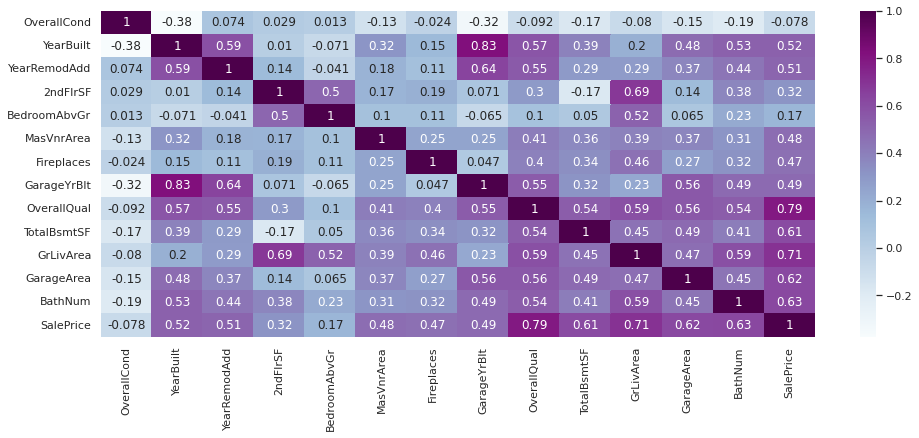

In [73]:
corr = data.corr()
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.0)
sns.heatmap(corr, annot=True, cmap="BuPu")

'GrLivArea' and 'TotRmsAbvGrd' are strongly correlative, so if I delete 'TotRmsAbvGrd' I almost won't lose information

In [74]:
df = df.drop(['TotRmsAbvGrd'], axis=1)
test_data = test_data.drop(['TotRmsAbvGrd'], axis=1)

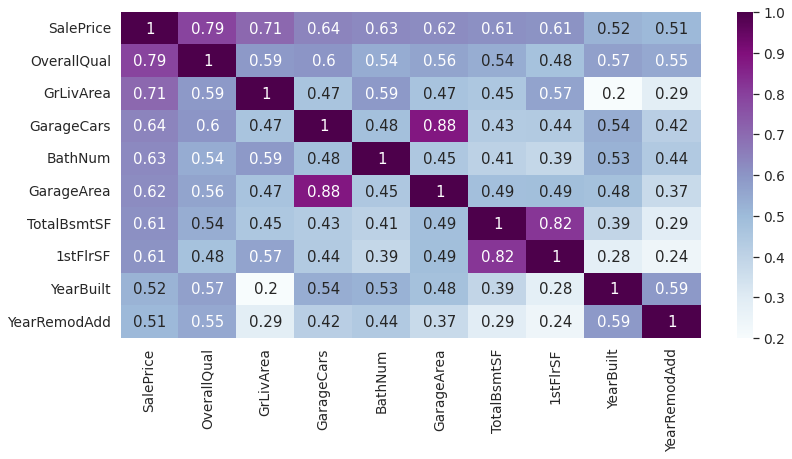

In [75]:
k = 10 #number of variables for heatmap
plt.figure(figsize=(13, 6))
corrmat = df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols.values, xticklabels=cols.values, cmap="BuPu")

As a result, make sure that all stronfly correlative features are in good features, for example, I deleted '1stFlrSF' since it strongly correlates with 'TotalBsmtSF'. And delete 'GarageCars' from data

In [76]:
df = df.drop(['GarageCars'], axis=1)
test_data = test_data.drop(['GarageCars'], axis=1)

# Outliars

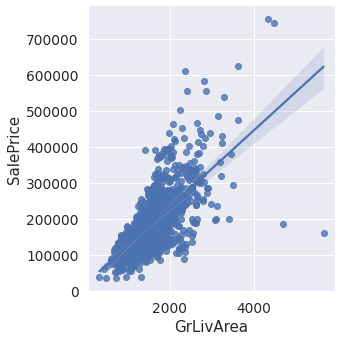

In [77]:
sns.lmplot(x='GrLivArea', y="SalePrice", data=df)

Two lowest values are far away and can be considered as outliars

In [78]:
data[(data['GrLivArea'] > 4000) & (data['SalePrice'] < 200000)]

,Condition1,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterQual,...,Fireplaces,SaleType,GarageYrBlt,OverallQual,TotalBsmtSF,GrLivArea,GarageArea,KitchenQual,BathNum,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,PosN,1Fam,2Story,5,2007,2008,Hip,CompShg,Ex,Ex,...,1,New,2007.0,10,3138,4676,884,Ex,4.5,184750
1299,Feedr,1Fam,2Story,5,2008,2008,Hip,ClyTile,Ex,Ex,...,3,New,2008.0,10,6110,5642,1418,Ex,4.5,160000


In [79]:
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index)

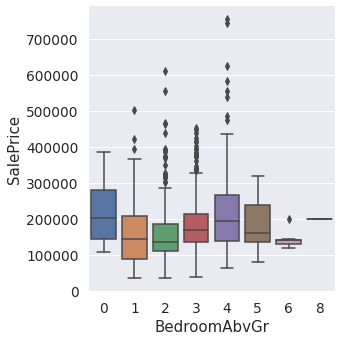

In [80]:
sns.catplot(x='BedroomAbvGr', y="SalePrice", data=data, kind='box')

In [81]:
data[data['BedroomAbvGr'] == 8]

,Condition1,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterQual,...,Fireplaces,SaleType,GarageYrBlt,OverallQual,TotalBsmtSF,GrLivArea,GarageArea,KitchenQual,BathNum,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
636,Feedr,2fmCon,2.5Fin,7,1914,1995,Hip,CompShg,Fa,Fa,...,0,WD,NaN,6,1440,3395,0,Fa,2.0,200000


In [82]:
df = df.drop(df[df['BedroomAbvGr'] == 8].index)

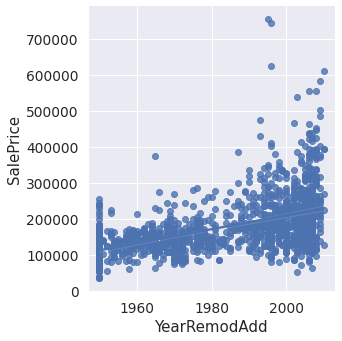

In [83]:
sns.lmplot(x='YearRemodAdd', y="SalePrice", data=df)

In [84]:
df[(df['YearRemodAdd'] > 1960) & (df['YearRemodAdd'] < 1970) & (df['SalePrice'] > 350000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BathNum,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,NaN,NaN,NaN,0,6,2009,WD,Normal,4.0,375000


In [85]:
df = df.drop(314, axis=0)

# Change rows that have some values and they're abcent in test dataset

In [86]:
df = df.drop(df[(df['RoofMatl'] == 'Metal') | (df['RoofMatl'] == 'Membran') | (df['RoofMatl'] == 'Roll')].index)

In [87]:
df['Fireplaces'] = np.where(df.Fireplaces == 3, 3, df.Fireplaces)
df['Fireplaces'] = np.where(df.Fireplaces == 4, 3, df.Fireplaces)
test_data['Fireplaces'] = np.where(test_data.Fireplaces == 3, 3, test_data.Fireplaces)
test_data['Fireplaces'] = np.where(test_data.Fireplaces == 4, 3, test_data.Fireplaces)

In [88]:
df['Heating'] = np.where(df.Heating == 'Floor', 'GasA', df.Heating)
df['Heating'] = np.where(df.Heating == 'OthW', 'GasA', df.Heating)

df['HouseStyle'] = np.where(df.HouseStyle == '2.5Fin', 'Fin', df.HouseStyle)
df['HouseStyle'] = np.where(df.HouseStyle == '1.5Fin', 'Fin', df.HouseStyle)
test_data['HouseStyle'] = np.where(test_data.HouseStyle == '1.5Fin', 'Fin', test_data.HouseStyle)

df['Electrical'] = np.where(df.Electrical == 'Mix', 'SBrkr', df.Electrical)

# Needed to Change to Ordinal Data

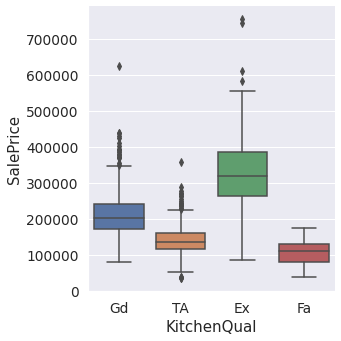

In [89]:
sns.catplot(x='KitchenQual', y="SalePrice", data=df, kind='box')

In [90]:
mapper_feat = ['KitchenQual', 'ExterQual', 'BsmtQual', ]
mapper_2_feat = ['FireplaceQu', 'HeatingQC', 'GarageQual']
mapper_3_feat = ['PoolQC']
mapper = {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}
mapper_2 = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}


In [91]:
for feat in mapper_feat:
  df[feat] = df[feat].replace(mapper)
  test_data[feat] = test_data[feat].replace(mapper)
for feat in mapper_2_feat:
  df[feat] = df[feat].replace(mapper_2)
  test_data[feat] = test_data[feat].replace(mapper_2)



# Delete Columns that have too many missing values

In [92]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1447,99.587061
MiscFeature,1399,96.283551
Alley,1363,93.805919
Fence,1172,80.660702
FireplaceQu,688,47.350310
LotFrontage,258,17.756366
GarageQual,80,5.505850
GarageYrBlt,80,5.505850
GarageCond,80,5.505850
GarageType,80,5.505850


In [93]:
col = missing_data.index[:6]
df = df.drop(col, axis=1)
test_data = test_data.drop(col, axis=1)

# Replace NULL values and Scale

In [94]:
df.dtypes[:10]

MSSubClass       int64
MSZoning        object
LotArea          int64
Street          object
LotShape        object
LandContour     object
Utilities       object
LotConfig       object
LandSlope       object
Neighborhood    object
dtype: object

In [95]:
num_chan = make_pipeline(
    SimpleImputer(strategy="mean", add_indicator=True), StandardScaler())
cat_chan = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value="missing"), OneHotEncoder(handle_unknown="ignore"))

num_chan_tree = SimpleImputer(strategy="mean", add_indicator=True)
cat_chan_tree = make_pipeline(
    SimpleImputer(strategy="most_frequent", fill_value="missing"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),)

linear_changer = make_column_transformer(
    (num_chan, selector(dtype_include="number")),
    (cat_chan, selector(dtype_include="object")),)

tree_changer = make_column_transformer(
    (num_chan_tree, selector(dtype_include="number")),
    (cat_chan_tree, selector(dtype_include="object")),)

# Save to New csv file

In [133]:
y = df.SalePrice
df_no_y = df.drop("SalePrice", axis=1)

In [121]:
data_lin = linear_changer.fit_transform(df_no_y)
data_tree = pd.DataFrame(tree_changer.fit_transform(df))
test_lin = pd.DataFrame(linear_changer.fit_transform(test_data))
test_tree = pd.DataFrame(tree_changer.fit_transform(test_data))

In [97]:
path = '/content/drive/MyDrive/Data/houses/'
data = df[good_feat]
good_feat_test = ['Condition1', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
            'ExterQual', 'ExterQual', 'Heating', 'HeatingQC', '2ndFlrSF', 'CentralAir', 'Electrical', 'BedroomAbvGr', 'MasVnrArea',
             'Fireplaces', 'SaleType', 'GarageYrBlt'] + strong_feat
good_test = test_data[good_feat_test]
data.to_csv(path + 'good_train.csv')
data.to_csv(path + 'good_test.csv')
df.to_csv(path + 'full_train.csv')
test_data.to_csv(path + 'full_test.csv')
data_lin.to_csv(path + 'linear_data.csv')
data_tree.to_csv(path + 'tree_data.csv')
test_lin.to_csv(path + 'linear_test_data.csv')
test_tree.to_csv(path + 'tree_test_data.csv')